# Ejemplo del uso de modelos pre entrenados de la librería Pytorch

El código a continuación presenta un ejemplo de uso de los modelos pre entrenados de CNN de la librería Pytorch. Para más información sobre los modelos se recomienda el siguiente [enlace](https://pytorch.org/vision/main/models.html), a su vez, si se desea profundizar en las funciones utilizadas se recomienda la [documentación de la librería Pytorch](https://pytorch.org/docs/stable/index.html)

## Importamos los modelos

In [136]:
from torchvision import models
import torch

dir(models)  # Visualización de las distintas arquitecturas en la librería Pytorch

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

Las anteriores cadenas de caracteres corresponden a las distintas funciones y clases que tiene la librería ```torchvision```. Si notamos existe una variable ```'alexnet'``` y otra ```'AlexNet'```. ```'AlexNet'``` corresponde a la clase en Python mientras que ```'alexnet'``` es una función que devuelve el modelo inicializado de la clase AlexNet



In [137]:
modelo_pre_entrenado = models.alexnet(pretrained=True)
modelo_pre_entrenado # imprimimos el modelo para saber su arquitectura

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Vamos a utilizar el modelo de reconocimiento de imágenes AlexNet, el cual está entrenado con el conjunto de datos **ImageNet** para clasificar algunas imágenes de cámaras trampa. Para esto utilizaremos algunas librerías de procesamiento y manipulación de imágenes.

In [138]:
from PIL import Image
from skimage import io, transform
import matplotlib.pyplot as plt

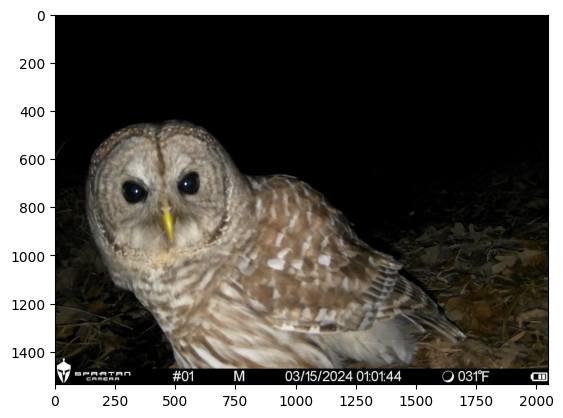

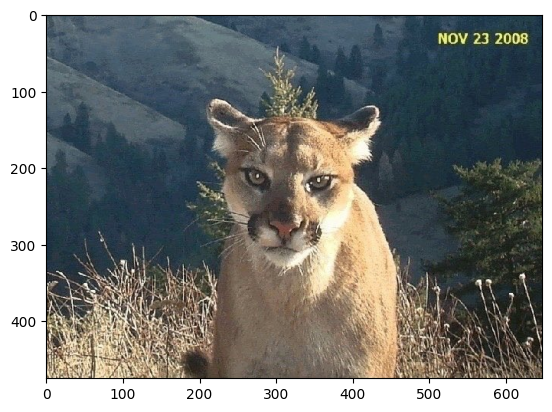

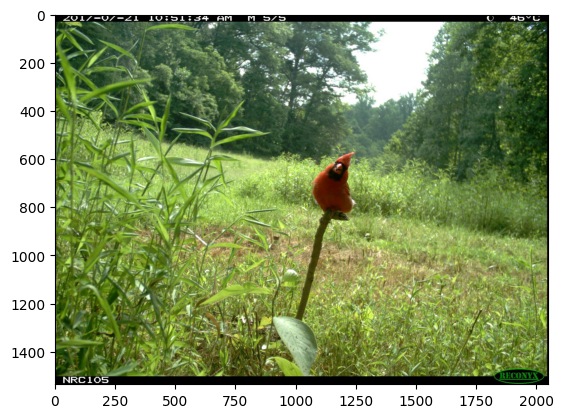

In [139]:
img_1 = Image.open('/content/buho.jpg')
img_2 = Image.open('/content/felino.jpg')
img_3 = Image.open('/content/cardenal.jpg')


for img in [img_1, img_2, img_3]:
  plt.imshow(img)
  plt.show()

Tenemos que ajustar las dimensiones de la imagen para que se adapten a la entrada de nuestro modelo, en este caso la primer capa convolucional admite una entrada de 224×224

In [140]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.456,0.406], # Utilizamos los mismos valores que se usaron para entrenar el modelo
        std=[0.229,0.224,0.225])
                              ])

Es una práctica común normalizar las imágenes con la media y desviación estandar descritas en el código anterior, esto se debe a que estas son las mismas medias y desviación estandar con las que se ajustan las bases de datos de los modelos pre entrenados.

In [141]:
modelo_pre_entrenado.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

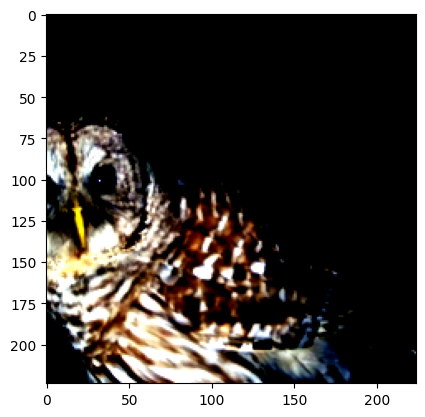

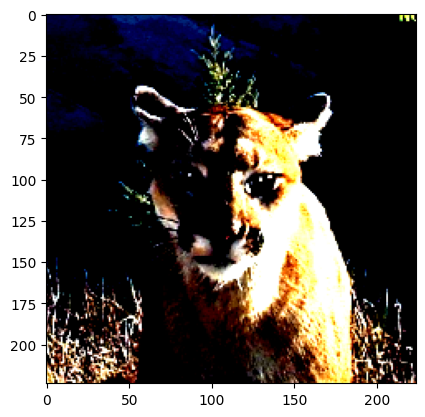

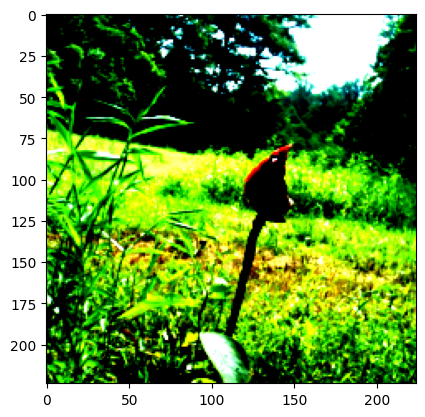

In [142]:
output = []

for img in [img_1, img_2, img_3]:
  img = transform(img)
  batch_t = torch.unsqueeze(img, 0)
  output.append(modelo_pre_entrenado(batch_t))
  plt.figure()
  plt.imshow(img.permute(1,2,0).numpy())
  plt.show()

In [143]:
output[0].shape

torch.Size([1, 1000])

In [144]:
with open('imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]
print("Number of classes: {}".format(len(classes)))
classes

Number of classes: 1000


['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

In [145]:
i=0

for output_img in output:
  _, indices = torch.sort(output_img, descending=True)
  percentage = torch.nn.functional.softmax(output_img, dim=1)[0] * 100
  print('imagen:',i+1)
  print([(classes[idx], percentage[idx].item()) for idx in indices[0][:10]])
  i+=1

imagen: 1
[('kite', 37.25593566894531), ('great grey owl, great gray owl, Strix nebulosa', 24.02072525024414), ('puffer, pufferfish, blowfish, globefish', 16.181968688964844), ('red-backed sandpiper, dunlin, Erolia alpina', 14.240199089050293), ('limpkin, Aramus pictus', 3.1319148540496826), ('African grey, African gray, Psittacus erithacus', 1.1985692977905273), ('Indian cobra, Naja naja', 0.9528627395629883), ('house finch, linnet, Carpodacus mexicanus', 0.37990525364875793), ('dowitcher', 0.36667490005493164), ('hummingbird', 0.24303223192691803)]
imagen: 2
[('cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', 99.36904907226562), ('lion, king of beasts, Panthera leo', 0.5473854541778564), ('lynx, catamount', 0.018942760303616524), ('coyote, prairie wolf, brush wolf, Canis latrans', 0.01575865037739277), ('red wolf, maned wolf, Canis rufus, Canis niger', 0.01562802493572235), ('dhole, Cuon alpinus', 0.0093397730961442), ('timber wolf, grey wolf, gray wolf, Can

Observamos en la primera imagen que la etiqueta esperada por el modelo es **buho**, sin embargo este clasifica la imagen como una cometa con un 37.25% de confianza y en segundo lugar una clase de buho con una confianza del 24.02%

La segunda imagen reconoce casi perfectamente al animal como un **puma** con un 99.37%

Por último, en la tercer imagen el modelo no logra reconocer la especie del animal, aún así acierta en la mayoría de categorías propuestas pues los primeros animales son aves (gallo, centropus, meropidae).